In [1]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import cifar10 #tensorflow for neural network stuff

from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer

from skimage.transform import resize

import matplotlib.pyplot as plt
import csv

import random

In [2]:
#Parameter

#Speicherort der Test-Daten for example './GTSRB/Training'
TRAINING_DATA_PATH = "C:/Users/de136581/Documents/Uni/SoSe_2024/DSKI_Projekt/Data_trafic_Signs/Final_Training/GTSRB/Final_Training/Images" #"Z:/Daten/Universität/DSKI_Projektarbeit/DATA_DSKI_Projekt/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images" #

TEST_DATA_PATH = "Z:/Daten/Universität/DSKI_Projektarbeit/DATA_DSKI_Projekt/GTSRB_Online-Test-Images/GTSRB/Online-Test/Images"

In [4]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

def rezizeImg(imgs_lst):
    new_size = (32, 32)
    resized_images = []
    for img in imgs_lst:
        resized_img = resize(img, new_size, anti_aliasing=True)
        resized_images.append(resized_img)

    return np.array(resized_images)

In [5]:
# Trainings und Testdaten vorbereiten
trainImages, trainLabels =  readTrafficSigns(TRAINING_DATA_PATH)

In [6]:
# Train-Test-Aufteilung
X_train, X_test, y_train, y_test = train_test_split(trainImages,  trainLabels, test_size=0.2, random_state=42)
# One-Hot-Encoding der Labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

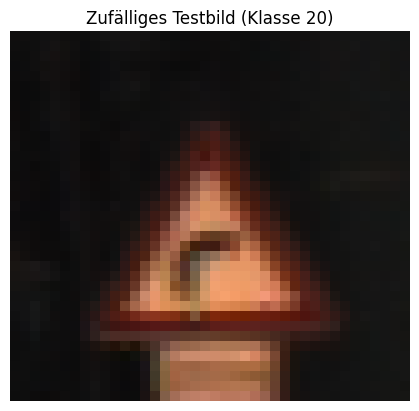

In [7]:
# Wähle ein zufälliges Bild aus dem Testdatensatz
random_index = np.random.randint(0, len(X_test))
test_image = X_train[random_index]
true_label = y_train[random_index]

# Zeige das Bild an
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"Zufälliges Testbild (Klasse {np.argmax(true_label)})")
plt.axis('off')
plt.show()

In [8]:
#X_train enthält deine Bilder
new_size = (32, 32)
resized_images = []
for img in X_train:
    resized_img = resize(img, new_size, anti_aliasing=True)
    resized_images.append(resized_img)

X_train = np.array(resized_images)

In [9]:
# Modellarchitektur
# Definiere das Modell
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))  # 43 Klassen für Verkehrszeichen

# Kompiliere das Modell
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\de136581\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(X_train)

[[[[2.41599673e-06 2.47683533e-06 2.25515396e-06]
   [3.25825613e-06 3.07420896e-06 2.67919881e-06]
   [3.57310978e-06 3.25843280e-06 2.92979803e-06]
   ...
   [2.29844204e-06 2.52230257e-06 2.52230257e-06]
   [2.24284486e-06 2.52925179e-06 2.52925179e-06]
   [2.32624052e-06 2.56653266e-06 2.56211570e-06]]

  [[2.79451569e-06 3.09959273e-06 2.37671361e-06]
   [3.72087743e-06 4.16005878e-06 3.11578879e-06]
   [3.30443004e-06 3.74814613e-06 2.99116664e-06]
   ...
   [2.10108419e-06 2.34673598e-06 2.36087067e-06]
   [2.09666723e-06 2.33790183e-06 2.34055187e-06]
   [2.12316991e-06 2.29461375e-06 2.25132567e-06]]

  [[4.06494291e-06 4.56331372e-06 3.08210065e-06]
   [4.59694274e-06 5.38401764e-06 3.72523573e-06]
   [4.31884018e-06 5.17170065e-06 3.87129558e-06]
   ...
   [2.07522930e-06 2.31175227e-06 2.40298095e-06]
   [2.10349913e-06 2.30203455e-06 2.35604125e-06]
   [2.23424627e-06 2.35945731e-06 2.40657346e-06]]

  ...

  [[7.31960654e-06 7.51843663e-06 7.03732212e-06]
   [4.81102643e-

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=32) #, validation_data=(X_test, y_test)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.4962 - loss: 1.9705
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9309 - loss: 0.2914
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9672 - loss: 0.1383
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9762 - loss: 0.0948
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9837 - loss: 0.0664
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9875 - loss: 0.0502
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9913 - loss: 0.0392
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9898 - loss: 0.0413
Epoch 9/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9905 - loss: 0.0362
Epoch 10/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9933 - loss: 0.0266


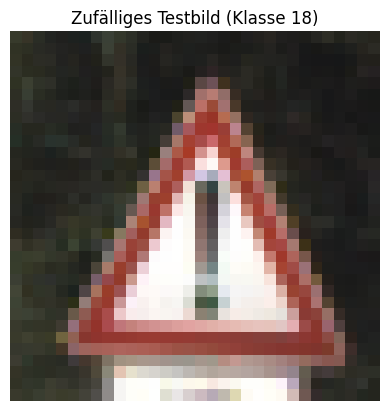

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Vorhergesagte Klasse: 18
Wahrscheinlichkeit: 1.00


In [14]:
#Testen des Modells:
    
# Wähle ein zufälliges Bild aus dem Testdatensatz
random_index = np.random.randint(0, len(X_test))
test_image = X_train[random_index]
true_label = y_train[random_index]

# Zeige das Bild an
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"Zufälliges Testbild (Klasse {np.argmax(true_label)})")
plt.axis('off')
plt.show()

# Klassifiziere das Bild mit dem trainierten Modell
predicted_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_class = np.argmax(predicted_probs)

# Gib die Klassifizierung und die Wahrscheinlichkeit aus
print(f"Vorhergesagte Klasse: {predicted_class}")
print(f"Wahrscheinlichkeit: {predicted_probs[0][predicted_class]:.2f}")